<a href="https://colab.research.google.com/github/marktelley/mtel_dl_assign/blob/main/SIT307_8_2HD_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT307 8.2HD

Mark Telley, May 2023

## Scope

Execute your code into a jupyter notebook (.ipynb file) and keep the output, write a report (.pdf file) to answer the following questions, and submit your code and report to OnTrack. 

Read the article and reproduce the results presented in Figure 4 using Python modules and packages (including your own script or customised codes). Write a report summarising the dataset, used ML methods, experiment protocol and results including variations, if any. 

During reproducing the results:
1. you should use the same set of features used by the authors.
2. you should use the same classifier with exact parameter values.
3. you should use the same training/test splitting approach as used by the authors.
4. you should use the same pre/post processing, if any, used by the authors.
5. you should report the same performance metric (Accuracy and F2 score) as shown in Figure 4. 

Paper: [Mushroom data creation, curation, and simulation to support classification tasks](https://www.nature.com/articles/s41598-021-87602-3)

*D. Wagner, D. Heider, G. Hattab Scientific Reports (2021)*

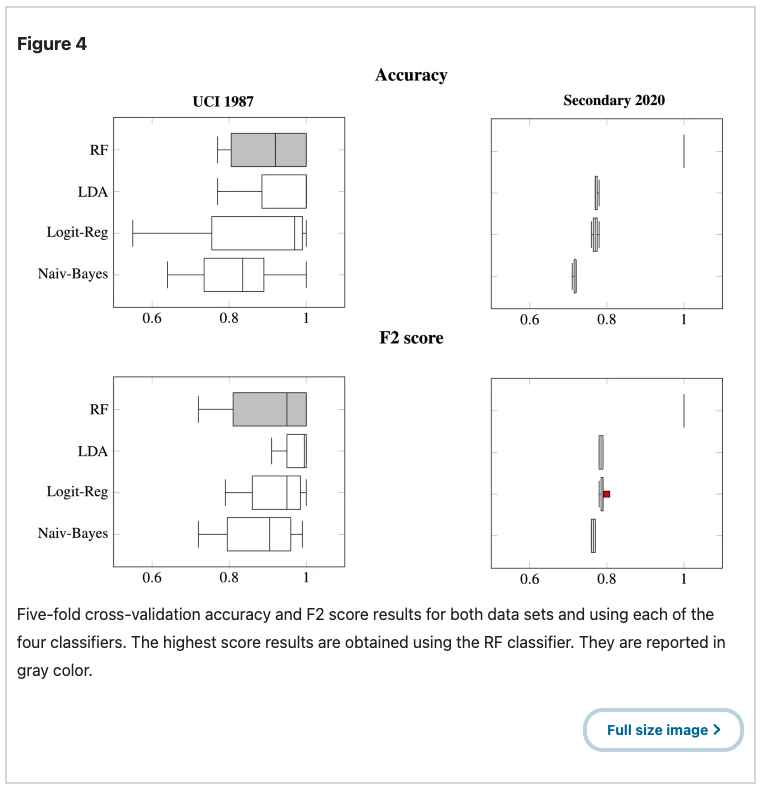

## Approach

To reproduce the results presented in Figure 4 and replicate the methodology outlined in the study below:

- **Data Formatting**
- **Data Curation**
- **Data Simulation**
- **Data Quality and Integrity Checks**
- **Binary Classification**
- **Evaluation**

The following structure will be adopted:
- **Handle Provided Resources**
  - Data Formatting, Data Curation and Simulation. 
  - As th csv files hand provide, this allows a student to skip the NLP component of the study - this would be VERY time consuming. but interesting to complete nonetheless.

- **Data Quality and Integrity**
  - This step will be replicated i.e. Correlation heat maps, check if classes are balanced, and as an extension/in line with theme of SIT307, clustering analysis will be completed, kmeans/t-SNE

- **Binary Classification**
  - RandomForest
  - LDA
  - Logit-Reg
  - Naive Bayes

- **Evaluation**
  - Conduct an evaluation of the Binary Classification
  

## Set up

In [ ]:
# MOUNT G DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import random
import csv
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import altair as alt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, precision_score, recall_score, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
import tensorflow as tf
# from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Submission

### **Handle Provided Resources:**

- primary_data_meta.txt
- primary_data.csv
- secondary_data.csv
- secondary_data_meta.txt


In [ ]:
# Files
primary_data_file = "/content/drive/MyDrive/Colab Notebooks/SIT307 8.2HD/primary_data.csv"
secondary_data_file = "/content/drive/MyDrive/Colab Notebooks/SIT307 8.2HD/secondary_data.csv"

# Read CSV file
def read_csv_file(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        data = [row for row in reader]
    return data

primary_data = read_csv_file(primary_data_file)
secondary_data = read_csv_file(secondary_data_file)

# Org in DFs
primary_df = pd.DataFrame(primary_data[1:], columns=primary_data[0])
secondary_df = pd.DataFrame(secondary_data[1:], columns=secondary_data[0])

#### Primary Dataset

In [ ]:
# Info
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   class                 173 non-null    object
 3   cap-diameter          173 non-null    object
 4   cap-shape             173 non-null    object
 5   Cap-surface           173 non-null    object
 6   cap-color             173 non-null    object
 7   does-bruise-or-bleed  173 non-null    object
 8   gill-attachment       173 non-null    object
 9   gill-spacing          173 non-null    object
 10  gill-color            173 non-null    object
 11  stem-height           173 non-null    object
 12  stem-width            173 non-null    object
 13  stem-root             173 non-null    object
 14  stem-surface          173 non-null    object
 15  stem-color            173 non-null    ob

In [ ]:
# Move class column to the end
def move_class_to_end(df):
    return df[[col for col in df.columns if col != 'class'] + ['class']]

In [ ]:
# Move
primary_df = move_class_to_end(primary_df)

# Display Optinos
original_max_columns = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', None)

# Show
primary_df[:5]

,family,name,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season,class
0,Amanita Family,Fly Agaric,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],,[w],"[15, 20]","[15, 20]",[s],[y],[w],[u],[w],[t],"[g, p]",,[d],"[u, a, w]",p
1,Amanita Family,Panther Cap,"[5, 10]","[p, x]",[g],[n],[f],[e],,[w],"[6, 10]","[10, 20]",,[y],[w],[u],[w],[t],[p],,[d],"[u, a]",p
2,Amanita Family,False Panther Cap,"[10, 15]","[x, f]",,"[g, n]",[f],[e],,[w],"[10, 12]","[10, 20]",,,[w],[u],[w],[t],"[e, g]",,[d],"[u, a]",p
3,Amanita Family,The Blusher,"[5, 15]","[x, f]",,[n],[t],,,[w],"[7, 15]","[10, 25]",[b],,[w],[u],[w],[t],[g],,[d],"[u, a]",e
4,Amanita Family,Death Cap,"[5, 12]","[x, f]",[h],[r],[f],,[c],[w],"[10, 12]","[10, 20]",,,[w],[u],[w],[t],"[g, p]",,[d],"[u, a]",p


In [ ]:
# Copy for later use
primary_df_copy = primary_df.copy()

# Remove White space // Null Values are not being picked up
primary_df_2 = primary_df.replace('', np.nan)
primary_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   cap-diameter          173 non-null    object
 3   cap-shape             173 non-null    object
 4   Cap-surface           133 non-null    object
 5   cap-color             173 non-null    object
 6   does-bruise-or-bleed  173 non-null    object
 7   gill-attachment       145 non-null    object
 8   gill-spacing          102 non-null    object
 9   gill-color            173 non-null    object
 10  stem-height           173 non-null    object
 11  stem-width            173 non-null    object
 12  stem-root             27 non-null     object
 13  stem-surface          65 non-null     object
 14  stem-color            173 non-null    object
 15  veil-type             9 non-null      ob

#### Secondary Dataset

For the simulation, the dataset was generated by the researchers who chose to create 353 hypothetical mushroom entries per species, replicating the number of entries per species in the 1987 dataset. The intermediary and final CSV files consisted of a header followed by 61,069 (which matches what has been provided) hypothetical mushroom entries. The dataset comprised one binary class, 17 nominal variables, and three quantitative variables.


In [ ]:
# Info
secondary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 61069 non-null  object
 1   cap-diameter          61069 non-null  object
 2   cap-shape             61069 non-null  object
 3   cap-surface           61069 non-null  object
 4   cap-color             61069 non-null  object
 5   does-bruise-or-bleed  61069 non-null  object
 6   gill-attachment       61069 non-null  object
 7   gill-spacing          61069 non-null  object
 8   gill-color            61069 non-null  object
 9   stem-height           61069 non-null  object
 10  stem-width            61069 non-null  object
 11  stem-root             61069 non-null  object
 12  stem-surface          61069 non-null  object
 13  stem-color            61069 non-null  object
 14  veil-type             61069 non-null  object
 15  veil-color            61069 non-null

In [ ]:
# Move
secondary_df = move_class_to_end(secondary_df)

# Cast cont variable columns as float
secondary_df['cap-diameter'] = secondary_df['cap-diameter'].astype(float)
secondary_df['stem-height'] = secondary_df['stem-height'].astype(float)
secondary_df['stem-width'] = secondary_df['stem-width'].astype(float)

# Show
secondary_df[:5]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,,w,16.95,17.09,s,y,w,u,w,t,g,,d,w,p
1,16.60,x,g,o,f,e,,w,17.99,18.19,s,y,w,u,w,t,g,,d,u,p
2,14.07,x,g,o,f,e,,w,17.80,17.74,s,y,w,u,w,t,g,,d,w,p
3,14.17,f,h,e,f,e,,w,15.77,15.98,s,y,w,u,w,t,p,,d,w,p
4,14.64,x,h,o,f,e,,w,16.53,17.20,s,y,w,u,w,t,p,,d,w,p


In [ ]:
# Handle whitespace
secondary_df_2 = secondary_df.replace('', np.nan)
secondary_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

#### **Handling Missing Values**

Researchers handled missing values by using an imputation method, that is to say a threshold based filtering. First and to limit the dilution of the analysis, variables with more then 50% missing values are removed. Second, the remaining data with missing values are replaced using the most frequent single  imputation. `sklearn simpleimputer` is used. 

In [ ]:
# Threshold-based filtering
threshold = 0.5
primary_df = primary_df.replace('', np.nan)

missing_df = primary_df.isnull().sum() / len(primary_df)
missing_columns = missing_df[missing_df >= threshold].index.tolist()

# Print columns that have more than or equal to 50% of values missing
print("Columns with >= 50% missing values:", missing_columns)

Columns with >= 50% missing values: ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'Spore-print-color']


In [ ]:
# Simple imputation as reference in the paper.
imputer = SimpleImputer(strategy='most_frequent')
primary_df = pd.DataFrame(imputer.fit_transform(primary_df), columns=primary_df.columns)

# Keep a copy
primary_df = primary_df

primary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   cap-diameter          173 non-null    object
 3   cap-shape             173 non-null    object
 4   Cap-surface           173 non-null    object
 5   cap-color             173 non-null    object
 6   does-bruise-or-bleed  173 non-null    object
 7   gill-attachment       173 non-null    object
 8   gill-spacing          173 non-null    object
 9   gill-color            173 non-null    object
 10  stem-height           173 non-null    object
 11  stem-width            173 non-null    object
 12  stem-root             173 non-null    object
 13  stem-surface          173 non-null    object
 14  stem-color            173 non-null    object
 15  veil-type             173 non-null    ob

In [ ]:
# Threshold-based filtering
threshold = 0.5
secondary_df = secondary_df.replace('', np.nan)

missing_df = secondary_df.isnull().sum() / len(secondary_df)
missing_columns = missing_df[missing_df >= threshold].index.tolist()

# Print columns that have more than or equal to 50% of values missing
print("Columns with >= 50% missing values:", missing_columns)

Columns with >= 50% missing values: ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']


In [ ]:
# Remove columns 
secondary_df = secondary_df.drop(missing_columns, axis=1)

In [ ]:
# Simple imputation as reference in the paper.
imputer = SimpleImputer(strategy='most_frequent')
secondary_df = pd.DataFrame(imputer.fit_transform(secondary_df), columns=secondary_df.columns)

# Keep a copy
secondary_df_copy = secondary_df

secondary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cap-diameter          61069 non-null  object
 1   cap-shape             61069 non-null  object
 2   cap-surface           61069 non-null  object
 3   cap-color             61069 non-null  object
 4   does-bruise-or-bleed  61069 non-null  object
 5   gill-attachment       61069 non-null  object
 6   gill-spacing          61069 non-null  object
 7   gill-color            61069 non-null  object
 8   stem-height           61069 non-null  object
 9   stem-width            61069 non-null  object
 10  stem-color            61069 non-null  object
 11  has-ring              61069 non-null  object
 12  ring-type             61069 non-null  object
 13  habitat               61069 non-null  object
 14  season                61069 non-null  object
 15  class                 61069 non-null

In [ ]:
# Show updated imputation vales
secondary_df[:5]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w,p
1,16.6,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u,p
2,14.07,x,g,o,f,e,c,w,17.8,17.74,w,t,g,d,w,p
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w,p
4,14.64,x,h,o,f,e,c,w,16.53,17.2,w,t,p,d,w,p


In [ ]:
# Return column view PD Options
pd.set_option('display.max_columns', original_max_columns)

#### **UCI 1987 Dataset**

Source: https://datahub.io/machine-learning/mushroom

In [ ]:
# Access Dataset
url = "https://datahub.io/machine-learning/mushroom/r/1.csv"
UCI1987 = pd.read_csv(url)

# Info
UCI1987.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
UCI1987.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [ ]:
# Save databub data to csv 
UCI1987.to_csv('UCI1987_mushroom_data.csv', index=False)

# Copy for later use
UCI1987_copy = UCI1987.copy()

# Simple imputation
imputer = SimpleImputer(strategy='most_frequent')
UCI1987 = pd.DataFrame(imputer.fit_transform(UCI1987), columns=UCI1987.columns)
UCI1987.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

Access dataset via : https://drive.google.com/file/d/1U0ZpeV_WWrp8zistFLuKBm4DomM8CPBz/view?usp=sharing 

### **Data quality and integrity**

In [ ]:
# Encode
encoder = LabelEncoder()

# Loop through non numerica cols
for column in secondary_df.columns:
    if not secondary_df[column].dtype.kind in ['i', 'f']:
        secondary_df[column] = encoder.fit_transform(secondary_df[column])

# Show
secondary_df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,1481,6,2,6,0,2,0,10,1577,1656,11,1,2,0,3,1
1,1614,6,2,6,0,2,0,10,1681,1766,11,1,2,0,2,1
2,1362,6,2,6,0,2,0,10,1662,1721,11,1,2,0,3,1
3,1372,2,3,1,0,2,0,10,1463,1545,11,1,5,0,3,1
4,1419,6,3,6,0,2,0,10,1537,1667,11,1,5,0,3,1


In [ ]:
def plot_correlation_heatmap(df, colour_, title):
    # Correlation matrix
    correlations = df.corr()

    # Mask: filer out self-correlations
    mask = ~correlations.isna() & (correlations != 1)

    # Flatten 
    flattened = correlations[mask].stack().reset_index()
    flattened.columns = ['Variable 1', 'Variable 2', 'Correlation']

    # Sort
    sorted_correlations = flattened.sort_values(by='Correlation', ascending=False)

    # Print top 5 cors
    top_5_correlations = sorted_correlations.head(5)
    print(top_5_correlations)

    # Plotly
    fig = px.imshow(correlations.values,
                    x=correlations.columns,
                    y=correlations.columns,
                    color_continuous_scale=colour_,
                    labels=dict(color='Correlation'),
                    title=f'{title} Correlations - Data')

    # Layout
    fig.update_layout(
        width=800,
        height=800
    )

    # Show 
    fig.show()

In [ ]:
# Loop through non numerica cols
for column in primary_df.columns:
    if not primary_df[column].dtype.kind in ['i', 'f']:
        primary_df[column] = encoder.fit_transform(primary_df[column])

# Show
primary_df.head()

,family,name,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season,class
0,0,60,9,22,9,7,0,3,0,49,...,13,36,0,4,1,3,3,1,7,1
1,0,96,31,17,13,39,0,3,0,49,...,13,36,0,4,1,10,3,1,8,1
2,0,55,8,22,39,13,0,3,0,49,...,10,36,0,4,1,0,3,1,8,1
3,0,145,34,22,39,39,1,1,0,49,...,10,36,0,4,1,4,3,1,8,0
4,0,41,32,22,19,52,0,1,0,49,...,10,36,0,4,1,3,3,1,8,1


NOTE: CORR PLOT SCREEN SHOTS HAVE BEEN INCLUDED - PLOTY SOMETIMES DOES NOT EXPORT WELL.

In [ ]:
plot_correlation_heatmap(primary_df, 'blues', 'Primary')

       Variable 1    Variable 2  Correlation
352      has-ring     ring-type     0.551472
373     ring-type      has-ring     0.551472
51   cap-diameter   stem-height     0.396526
212   stem-height  cap-diameter     0.396526
118     cap-color    stem-color     0.319455


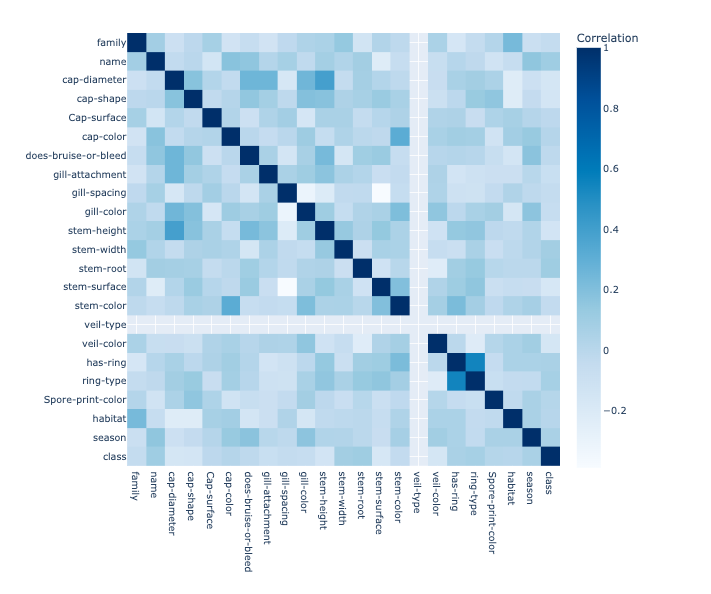

In [ ]:
plot_correlation_heatmap(secondary_df, 'greens', 'Secondary')

       Variable 1    Variable 2  Correlation
135    stem-width  cap-diameter     0.803055
8    cap-diameter    stem-width     0.803055
191     ring-type      has-ring     0.532891
176      has-ring     ring-type     0.532891
120   stem-height  cap-diameter     0.521886


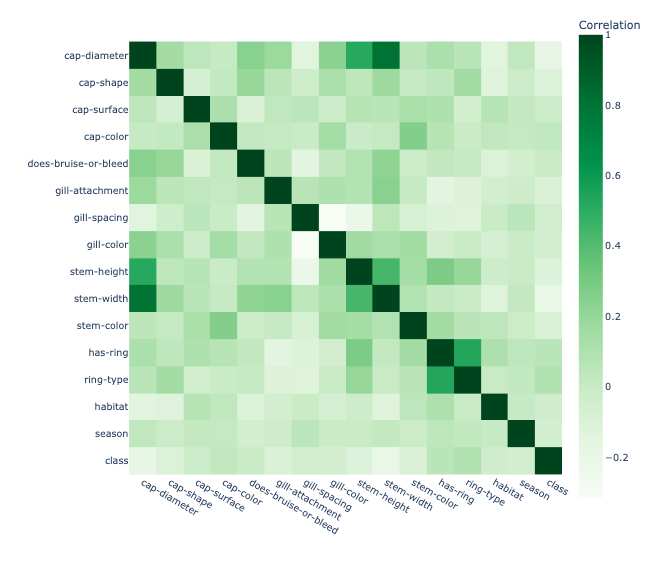

In [ ]:
# Calculate class proportions 
primary_class_counts = primary_df_copy['class'].value_counts()
secondary_class_counts = secondary_df_copy['class'].value_counts()
primary_class_proportions = primary_class_counts / primary_class_counts.sum()
secondary_class_proportions = secondary_class_counts / secondary_class_counts.sum()

# DF
class_weight_distribution_df = pd.DataFrame({
    'Class': [1, 0],
    'Primary': [primary_class_proportions[1], primary_class_proportions[0]],
    'Secondary': [secondary_class_proportions[1], secondary_class_proportions[0]],
})
print(class_weight_distribution_df)

# Plotly 100% Stacked
fig = go.Figure(data=[
    go.Bar(name='e', 
           x=["Primary", "Secondary"], 
           y=[primary_class_proportions[1], secondary_class_proportions[0]],
           marker_color="green"),
    go.Bar(name='p', 
           x=["Primary", "Secondary"], 
           y=[primary_class_proportions[1], secondary_class_proportions[0]],
           marker_color="blue"),
])

# Set range
fig.update_yaxes(range=[0, 1])

# Update Layout
fig.update_layout(
    title="Class Distribution",
    barmode="stack",
    showlegend=False,
    width=500,
    height=600
)

# Show
fig.show()

   Class   Primary  Secondary
0      1  0.445087   0.554913
1      0  0.554913   0.445087


**Futher Analysis**


KMeans Clustering for secondary_df


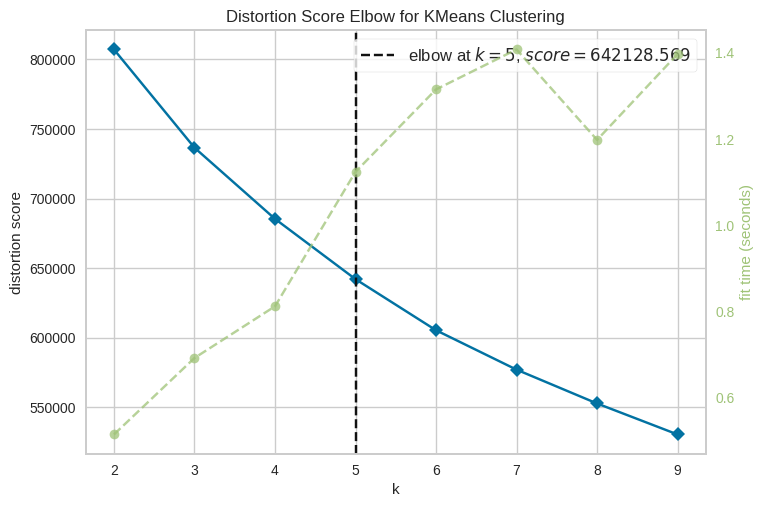

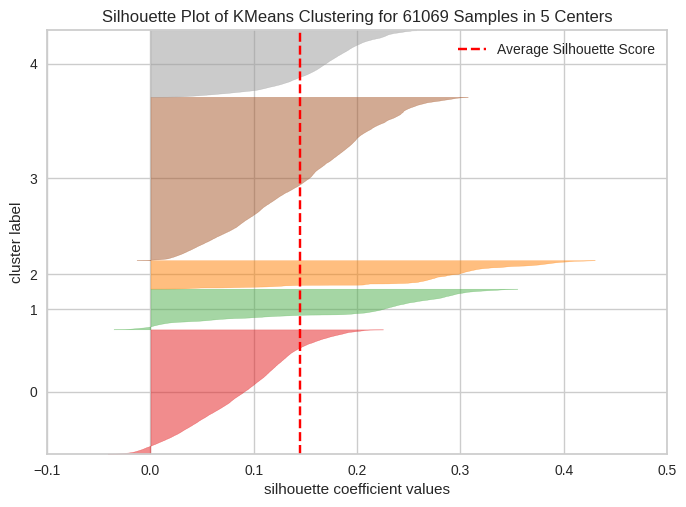

In [ ]:
def perform_kmeans(df):
    features = df.drop('class', axis=1).columns

    # Standardise
    scaler = StandardScaler().fit(df[features])
    df_scaled = scaler.transform(df[features])

    # KElbowVisualizer 
    model = KMeans(n_init=10, random_state=42) 
    visualizer = KElbowVisualizer(model, k=(2,10)) 
    visualizer.fit(df_scaled)  
    visualizer.show() 

    # KMeans 
    kmeans = KMeans(n_clusters=visualizer.elbow_value_, n_init=10)
    kmeans.fit(df_scaled)
    
    # Yellowbrick for vis
    visualizer_silhouette = SilhouetteVisualizer(kmeans)
    visualizer_silhouette.fit(df_scaled)
    visualizer_silhouette.show()

    return kmeans

# # Perform KMeans clustering on primary_df_copy
# print("KMeans Clustering for primary_df_copy")
# kmeans_primary = perform_kmeans(primary_df_copy)

# Call
if True:
  print("\nKMeans Clustering for secondary_df")
  kmeans_secondary = perform_kmeans(secondary_df)

In [ ]:
if True:
  # Standardize the data
  scaler = StandardScaler().fit(secondary_df)
  df_scaled = scaler.transform(secondary_df)

  # Perform PCA
  pca = PCA()
  df_pca = pca.fit_transform(df_scaled)

  # 80% variance explained
  explained_variance_ratio = pca.explained_variance_ratio_
  cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
  n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1

  print("Number of components for at least 80% variance explained:", n_components)

Number of components for at least 80% variance explained: 10


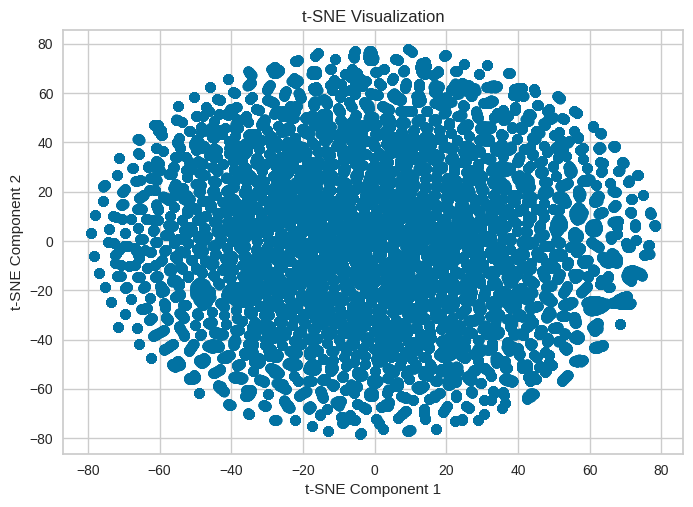

In [ ]:
if True:
  # Perform t-SNE
  tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
  df_tsne = tsne.fit_transform(df_pca)

  # t-SNE components
  plt.scatter(df_tsne[:, 0], df_tsne[:, 1])
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.title('t-SNE Visualization')
  plt.show()

  # Futher work is needed - There my might not be be distinct 
  # clusters or clear separations between different groups of data points

### Prep for Binary Classifcation

In [ ]:
# Handle Min and Max Values
primary_df_copy_2 = primary_df_copy.copy()

# Strip square brackets from the specified columns
columns_to_strip = ['cap-diameter', 'stem-height', 'stem-width']
primary_df_copy_2[columns_to_strip] = primary_df_copy_2[columns_to_strip].replace({r'\[|\]': ''}, regex=True)

# Extract values
primary_df_copy_2['cap-diameter'] = primary_df_copy_2['cap-diameter'].apply(lambda x: [float(i.strip()) for i in x.split(",")])
primary_df_copy_2['cap-diameter-min'] = primary_df_copy_2['cap-diameter'].apply(lambda x: x[0] if len(x) > 0 else None)
primary_df_copy_2['cap-diameter-max'] = primary_df_copy_2['cap-diameter'].apply(lambda x: x[1] if len(x) > 1 else None)

primary_df_copy_2['stem-height'] = primary_df_copy_2['stem-height'].apply(lambda x: [float(i.strip()) for i in x.split(",")])
primary_df_copy_2['stem-height-min'] = primary_df_copy_2['stem-height'].apply(lambda x: x[0] if len(x) > 0 else None)
primary_df_copy_2['stem-height-max'] = primary_df_copy_2['stem-height'].apply(lambda x: x[1] if len(x) > 1 else None)

primary_df_copy_2['stem-width'] = primary_df_copy_2['stem-width'].apply(lambda x: [float(i.strip()) for i in x.split(",")])
primary_df_copy_2['stem-width-min'] = primary_df_copy_2['stem-width'].apply(lambda x: x[0] if len(x) > 0 else None)
primary_df_copy_2['stem-width-max'] = primary_df_copy_2['stem-width'].apply(lambda x: x[1] if len(x) > 1 else None)


# Remove the original columns
columns_to_drop = ['cap-diameter', 'stem-height', 'stem-width']
primary_df_copy_2.drop(columns=columns_to_drop, inplace=True)

# # Print the modified DataFrame
primary_df_copy_2

,family,name,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,...,Spore-print-color,habitat,season,class,cap-diameter-min,cap-diameter-max,stem-height-min,stem-height-max,stem-width-min,stem-width-max
0,Amanita Family,Fly Agaric,"[x, f]","[g, h]","[e, o]",[f],[e],,[w],[s],...,,[d],"[u, a, w]",p,10.0,20.0,15.0,20.0,15.0,20.0
1,Amanita Family,Panther Cap,"[p, x]",[g],[n],[f],[e],,[w],,...,,[d],"[u, a]",p,5.0,10.0,6.0,10.0,10.0,20.0
2,Amanita Family,False Panther Cap,"[x, f]",,"[g, n]",[f],[e],,[w],,...,,[d],"[u, a]",p,10.0,15.0,10.0,12.0,10.0,20.0
3,Amanita Family,The Blusher,"[x, f]",,[n],[t],,,[w],[b],...,,[d],"[u, a]",e,5.0,15.0,7.0,15.0,10.0,25.0
4,Amanita Family,Death Cap,"[x, f]",[h],[r],[f],,[c],[w],,...,,[d],"[u, a]",p,5.0,12.0,10.0,12.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,[o],,[w],[f],[f],[f],[f],,...,,"[p, d]","[u, a]",p,2.0,6.0,4.0,7.0,20.0,40.0
169,Bracket Fungi,Elfin's Saddle,[o],,"[g, k]",[f],[f],[f],[f],,...,,[d],"[u, a]",p,2.0,4.0,2.0,5.0,10.0,20.0
170,Bracket Fungi,Turban Fungus,[o],,"[n, e]",[f],[f],[f],[f],,...,,[d],"[s, u]",p,5.0,15.0,2.0,5.0,20.0,30.0
171,Morel Family,Common Morel,"[p, c, o]",,"[n, g]",[f],[f],[f],[f],,...,,"[l, d]",[s],e,3.0,8.0,3.0,8.0,15.0,25.0


In [ ]:
ordinal_columns = ['family',	'name', 'class']

nominal_columns = ['cap-shape', 'Cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'Spore-print-color', 'habitat', 'season']

primary_df_copy_2 = pd.get_dummies(primary_df_copy_2, columns=nominal_columns)

label_encoder = LabelEncoder()
for column in ordinal_columns:
    primary_df_copy_2[column] = label_encoder.fit_transform(primary_df_copy_2[column])
primary_df_copy_2   

,family,name,class,cap-diameter-min,cap-diameter-max,stem-height-min,stem-height-max,stem-width-min,stem-width-max,"cap-shape_[b, f, s]",...,"season_[a, w]",season_[a],"season_[s, a, w]","season_[s, u, a, w]","season_[s, u, a]","season_[s, u]",season_[s],"season_[u, a, w]","season_[u, a]",season_[u]
0,0,60,1,10.0,20.0,15.0,20.0,15.0,20.0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,96,1,5.0,10.0,6.0,10.0,10.0,20.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,55,1,10.0,15.0,10.0,12.0,10.0,20.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,145,0,5.0,15.0,7.0,15.0,10.0,25.0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,41,1,5.0,12.0,10.0,12.0,10.0,20.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,19,162,1,2.0,6.0,4.0,7.0,20.0,40.0,0,...,0,0,0,0,0,0,0,0,1,0
169,3,49,1,2.0,4.0,2.0,5.0,10.0,20.0,0,...,0,0,0,0,0,0,0,0,1,0
170,3,152,1,5.0,15.0,2.0,5.0,20.0,30.0,0,...,0,0,0,0,0,1,0,0,0,0
171,13,35,0,3.0,8.0,3.0,8.0,15.0,25.0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# pre new DFs
secondary_df_copy_2 = secondary_df_copy.copy()
ordinal_columns = ['habitat', 'season', 'class']
label_encoder = LabelEncoder()
for column in ordinal_columns:
    secondary_df_copy_2[column] = label_encoder.fit_transform(secondary_df_copy_2[column])
nominal_columns = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type']
secondary_df_copy_2 = pd.get_dummies(secondary_df_copy_2, columns=nominal_columns)
secondary_df_copy_2

,cap-diameter,stem-height,stem-width,habitat,season,class,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,...,has-ring_0,has-ring_1,ring-type_0,ring-type_1,ring-type_2,ring-type_3,ring-type_4,ring-type_5,ring-type_6,ring-type_7
0,1481,1577,1656,0,3,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1614,1681,1766,0,2,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1362,1662,1721,0,3,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1372,1463,1545,0,3,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,1419,1537,1667,0,3,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,73,283,569,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
61065,82,208,490,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
61066,82,276,584,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
61067,79,246,491,0,2,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


### **Binary Classification**
  - LDA
  - Logit-Reg
  - Naive Bayes
  - RandomForest
  


In [ ]:
# hyperparameter tuning
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(max_iter=10000),
        'param_grid': {'C': [0.01, 0.1, 1.0], 'solver': ['lbfgs', 'liblinear']}
    },
    {
        'name': 'Linear Discriminant Analysis',
        'model': LinearDiscriminantAnalysis(),
        'param_grid': {'solver': ['svd', 'lsqr', 'eigen']}
    },
    {
        'name': 'Gaussian Naive Bayes',
        'model': GaussianNB(),
        'param_grid': {'var_smoothing': [1e-9, 1e-7, 1e-5]}
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'param_grid': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
    }
]


In [ ]:
# Get the runtime type.
runtime_type = tf.config.experimental.list_physical_devices("GPU")

# Check if the runtime type is GPU.
if runtime_type:
  print("The runtime type is GPU.")
else:
  print("The runtime type is not GPU.")

The runtime type is GPU.


In [ ]:
# Variables

# datasets = [
#     {'name': 'Primary', 'df': primary_df.copy()},
#     {'name': 'Secondary', 'df': secondary_df.copy()}
# ]

primary_df_copy_2 = primary_df_copy_2.copy().dropna()
secondary_df_copy_2 = secondary_df_copy_2.copy().dropna()

datasets = [
    {'name': 'Primary', 'df': primary_df_copy_2.copy()},
    {'name': 'Secondary', 'df': secondary_df_copy_2.copy()}
]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-package

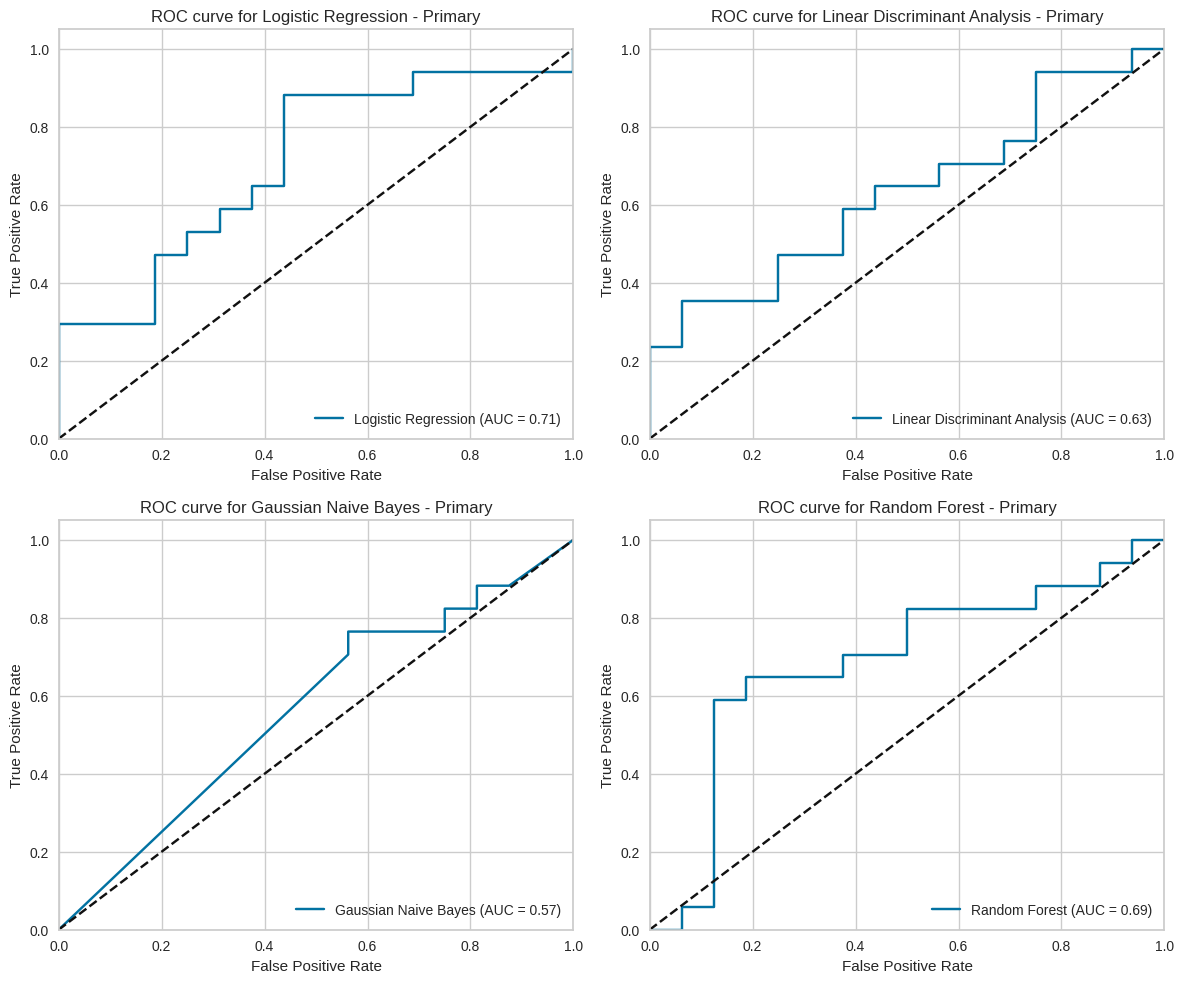

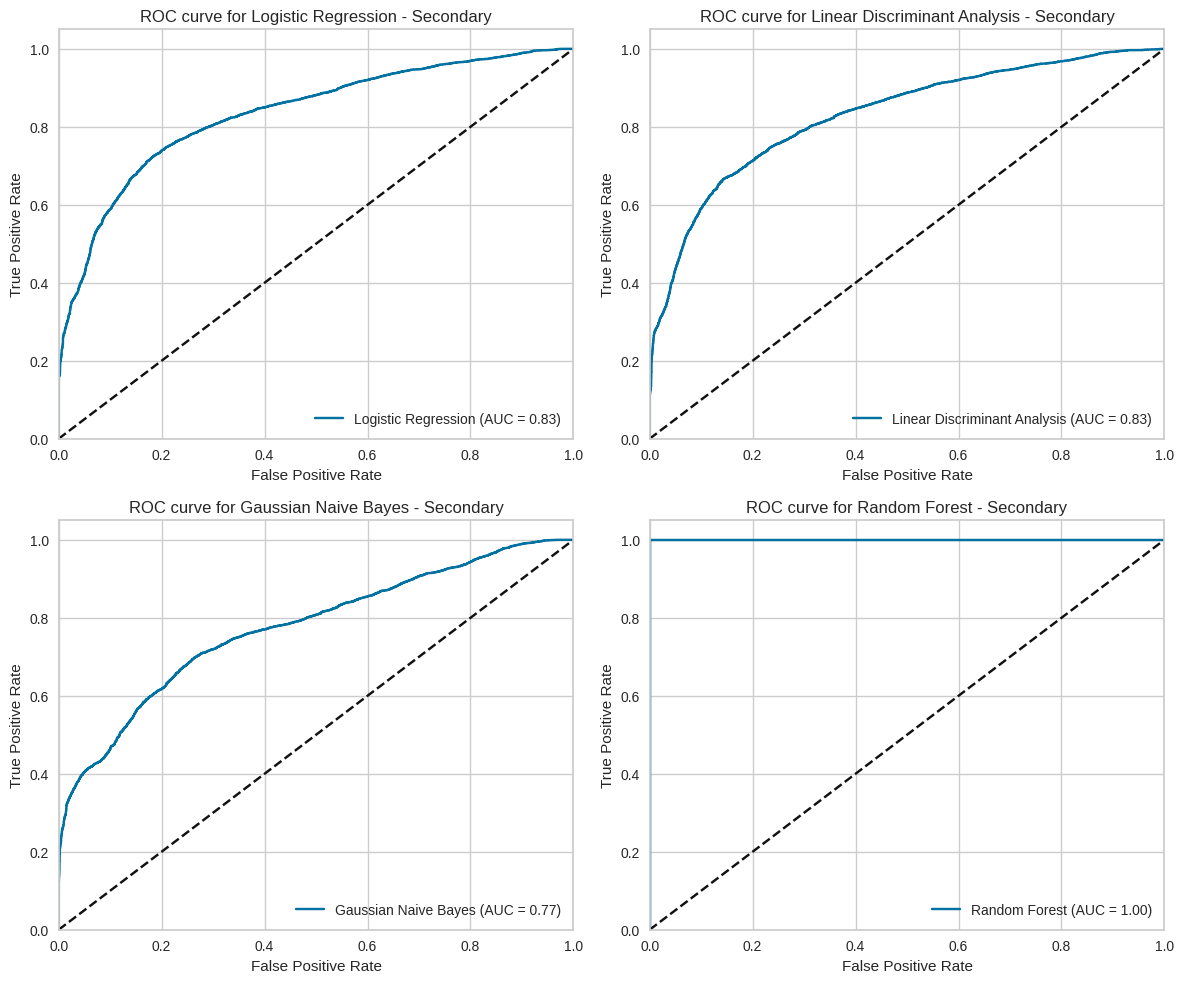

In [ ]:
results = []
metrics_df = pd.DataFrame(columns=['Dataset', 'Model', 'AUC', 'Precision', 'Recall', 'F2 Score'])

for idx, dataset in enumerate(datasets):
    
    # Data
    data = dataset['df'].copy()
    
    # Testing: Reduced  
    # num_rows = int(len(data) * 0.5)
    # data = data.head(num_rows).copy()

    # Shuffle
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)

    # Data variables
    X = data.drop(columns=['class'])
    y = data['class']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Perform five-fold cross-validation with hyperparameter
    for i, (model_info, ax) in enumerate(zip(models, axes.flatten())):
        model_name = model_info['name']
        model = model_info['model']
        param_grid = model_info['param_grid']

        # Grid search with cv=5
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)

        # Best score
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

        # Predict
        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X_test)[:, 1]
        else:
            y_prob = best_model.decision_function(X_test)

        # Computation
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        y_pred = best_model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f2_score_val = fbeta_score(y_test, y_pred, beta=2)

        # Store metrics
        metrics_df.loc[len(metrics_df)] = [dataset['name'], model_name, roc_auc, precision, recall, f2_score_val]

        # Plot ROC curve
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')

        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC curve for {model_name} - {datasets[idx]["name"]}')
        ax.legend(loc='lower right')

        # Accuracy and F2 scores using CV
        accuracy_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
        f2_scores = cross_val_score(best_model, X, y, cv=5, scoring=make_scorer(fbeta_score, beta=2))

        # Store the results
        for score, score_type in zip([accuracy_scores, f2_scores], ['Accuracy', 'F2 Score']):
            for s in score:
                results.append({
                    'Dataset': dataset['name'],
                    'Model': model_name,
                    'Score Type': score_type,
                    'Score': s
                })

    if len(models) % 2 != 0:
        fig.delaxes(axes.flatten()[-1])
    plt.tight_layout()

In [ ]:
metrics_df.to_csv("/content/drive/MyDrive/Colab Notebooks/SIT307 8.2HD/metrics_df.csv")

# Retrieve existing data
# metrics_df  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT307 8.2HD/metrics_df_V2.csv")

metrics_df  

,Unnamed: 0,Dataset,Model,AUC,Precision,Recall,F2 Score
0,0,Primary,Logistic Regression,0.709559,0.666667,0.823529,0.786517
1,1,Primary,Linear Discriminant Analysis,0.632353,0.578947,0.647059,0.632184
2,2,Primary,Gaussian Naive Bayes,0.566176,0.571429,0.705882,0.674157
3,3,Primary,Random Forest,0.687500,0.608696,0.823529,0.769231
4,4,Secondary,Logistic Regression,0.833837,0.786702,0.783207,0.783904
5,5,Secondary,Linear Discriminant Analysis,0.829839,0.773652,0.777432,0.776673
6,6,Secondary,Gaussian Naive Bayes,0.774667,0.787105,0.634533,0.660124
7,7,Secondary,Random Forest,1.000000,0.999852,1.000000,0.999970


In [ ]:
results_df = pd.DataFrame(results)
results_df.to_csv("/content/drive/MyDrive/Colab Notebooks/SIT307 8.2HD/results_df.csv")
# results_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SIT307 8.2HD/results_df_V2.csv")
results_df

,Unnamed: 0,Dataset,Model,Score Type,Score
0,0,Primary,Logistic Regression,Accuracy,0.636364
1,1,Primary,Logistic Regression,Accuracy,0.593750
2,2,Primary,Logistic Regression,Accuracy,0.500000
3,3,Primary,Logistic Regression,Accuracy,0.562500
4,4,Primary,Logistic Regression,Accuracy,0.656250
...,...,...,...,...,...
75,75,Secondary,Random Forest,F2 Score,1.000000
76,76,Secondary,Random Forest,F2 Score,1.000000
77,77,Secondary,Random Forest,F2 Score,0.999882
78,78,Secondary,Random Forest,F2 Score,0.999941


In [ ]:
# prep CV Data
scores = results_df['Score'].values
scores = pd.to_numeric(scores, errors='coerce')
grouped_data = results_df.groupby(['Model', 'Dataset'])

mean_scores = grouped_data['Score'].mean()
std_scores = grouped_data['Score'].std()

results_df = pd.DataFrame({'CV Mean Score': mean_scores, 'CV Standard Deviation': std_scores})
results_df = results_df.reset_index()
results_df

,Model,Dataset,CV Mean Score,CV Standard Deviation
0,Gaussian Naive Bayes,Primary,0.586144,0.100754
1,Gaussian Naive Bayes,Secondary,0.681100,0.025401
2,Linear Discriminant Analysis,Primary,0.611926,0.089953
3,Linear Discriminant Analysis,Secondary,0.766742,0.011729
4,Logistic Regression,Primary,0.639399,0.110730
5,Logistic Regression,Secondary,0.774263,0.010667
6,Random Forest,Primary,0.654063,0.115181
7,Random Forest,Secondary,0.999938,0.000060


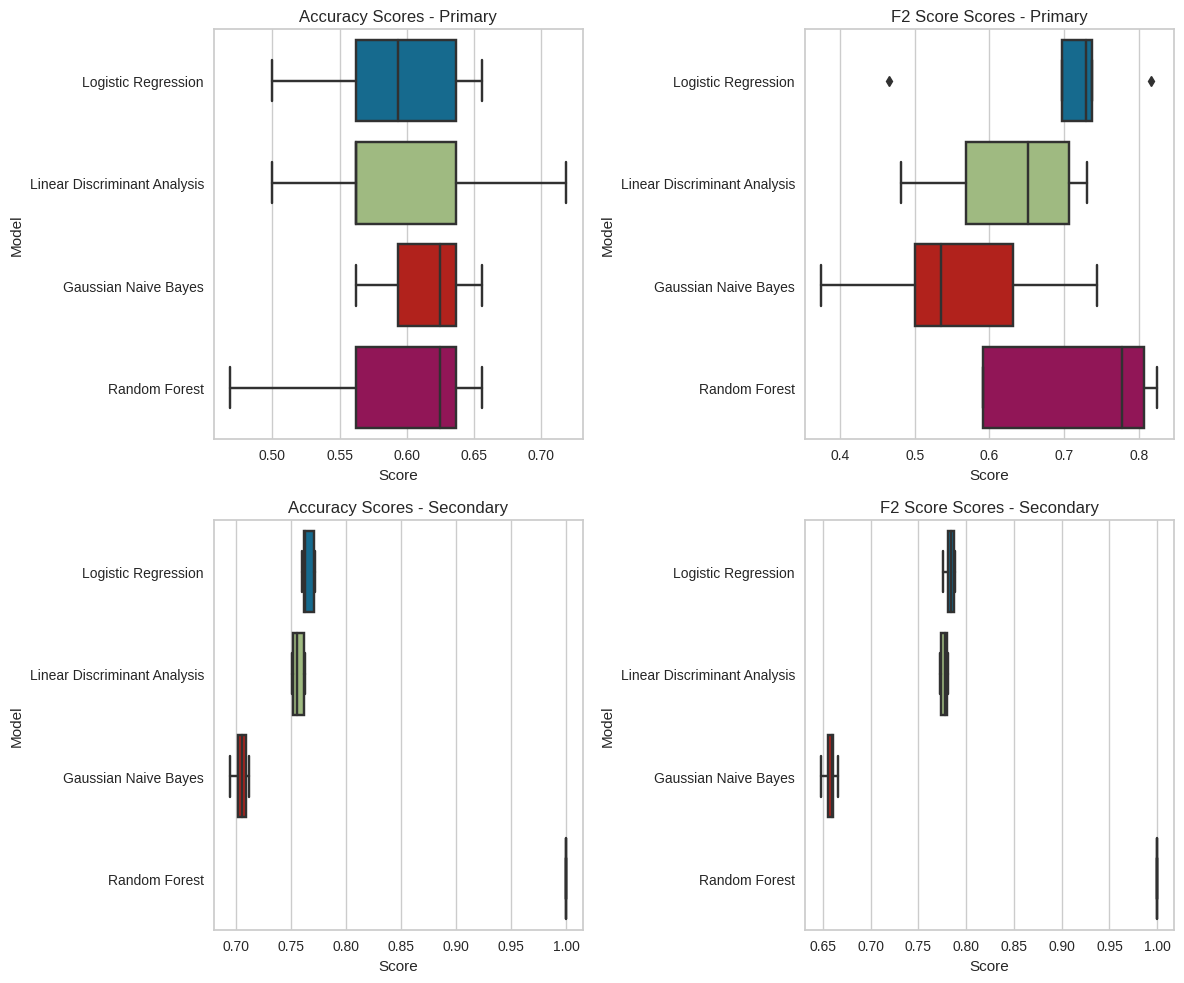

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for idx, (dataset_name, dataset_group) in enumerate(results_df.groupby(['Dataset', 'Score Type'])):
    row = idx // 2  
    col = idx % 2  

    ax = axes[row, col]

    # Box PLot
    sns.boxplot(data=dataset_group, y='Model', x='Score', orient='h', ax=ax)
    ax.set_title(f'{dataset_name[1]} Scores - {dataset_name[0]}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Model')

plt.tight_layout()

# Show
plt.show()

In [ ]:
# Print metrics
merged_data = pd.merge(metrics_df, results_df, on=['Model', 'Dataset'])
merged_data.to_csv("/content/drive/MyDrive/Colab Notebooks/SIT307 8.2HD/final_results_V2.csv")
merged_data

,Unnamed: 0,Dataset,Model,AUC,Precision,Recall,F2 Score,CV Mean Score,CV Standard Deviation
0,0,Primary,Logistic Regression,0.709559,0.666667,0.823529,0.786517,0.639399,0.110730
1,1,Primary,Linear Discriminant Analysis,0.632353,0.578947,0.647059,0.632184,0.611926,0.089953
2,2,Primary,Gaussian Naive Bayes,0.566176,0.571429,0.705882,0.674157,0.586144,0.100754
3,3,Primary,Random Forest,0.687500,0.608696,0.823529,0.769231,0.654063,0.115181
4,4,Secondary,Logistic Regression,0.833837,0.786702,0.783207,0.783904,0.774263,0.010667
5,5,Secondary,Linear Discriminant Analysis,0.829839,0.773652,0.777432,0.776673,0.766742,0.011729
6,6,Secondary,Gaussian Naive Bayes,0.774667,0.787105,0.634533,0.660124,0.681100,0.025401
7,7,Secondary,Random Forest,1.000000,0.999852,1.000000,0.999970,0.999938,0.000060


## REPORT

SEE PDF